In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (2).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (94).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (380).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (652).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (239).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (511).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (181).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (69).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (248).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (750).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (439).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (343).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-S

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import glob as gb
import numpy as np
import tensorflow as tn
import keras
from keras.layers import Conv2D , Dense ,Flatten,MaxPool2D
from keras.models import Sequential
%matplotlib inline


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
trainpath='/kaggle/input/intel-image-classification/seg_train'

In [4]:
import os
import glob as gb

# Specify the base directory path
base_path = '/kaggle/input/multiple-sclerosis'

# Construct the full path to the 'seg_train' directory
train_path = os.path.join(base_path, 'Multiple Sclerosis')

# Get the list of folders in the 'seg_train' directory
folders = os.listdir(train_path)

# Iterate over the folders
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    
    # Print the number of files found in the current folder
    print(f"For training data, found {len(files)} in folder {folder}")



For training data, found 761 in folder MS-Sagittal
For training data, found 650 in folder MS-Axial
For training data, found 1014 in folder Control-Sagittal
For training data, found 1002 in folder Control-Axial


In [5]:
size = []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(569, 1158, 4)    2764
(638, 1222, 4)     425
(628, 1158, 4)     170
(695, 1222, 4)      46
(661, 1493, 4)      14
(618, 758, 4)        2
(719, 1493, 4)       2
(687, 912, 4)        1
(543, 487, 4)        1
(606, 722, 4)        1
(515, 450, 4)        1
Name: count, dtype: int64

In [6]:
code ={'Control-Axial':0,'Control-Sagittal':1,'MS-Axial':2,'MS-Sagittal':3}

def get_code(n) :
    for x , y in code.items():
        if n==y :
            return x

In [7]:
import cv2

In [8]:
s = 100

In [9]:
x_train= []
y_train= []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image =cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])


In [10]:
print(f'we have {len(x_train)} in x_train')

we have 3427 in x_train


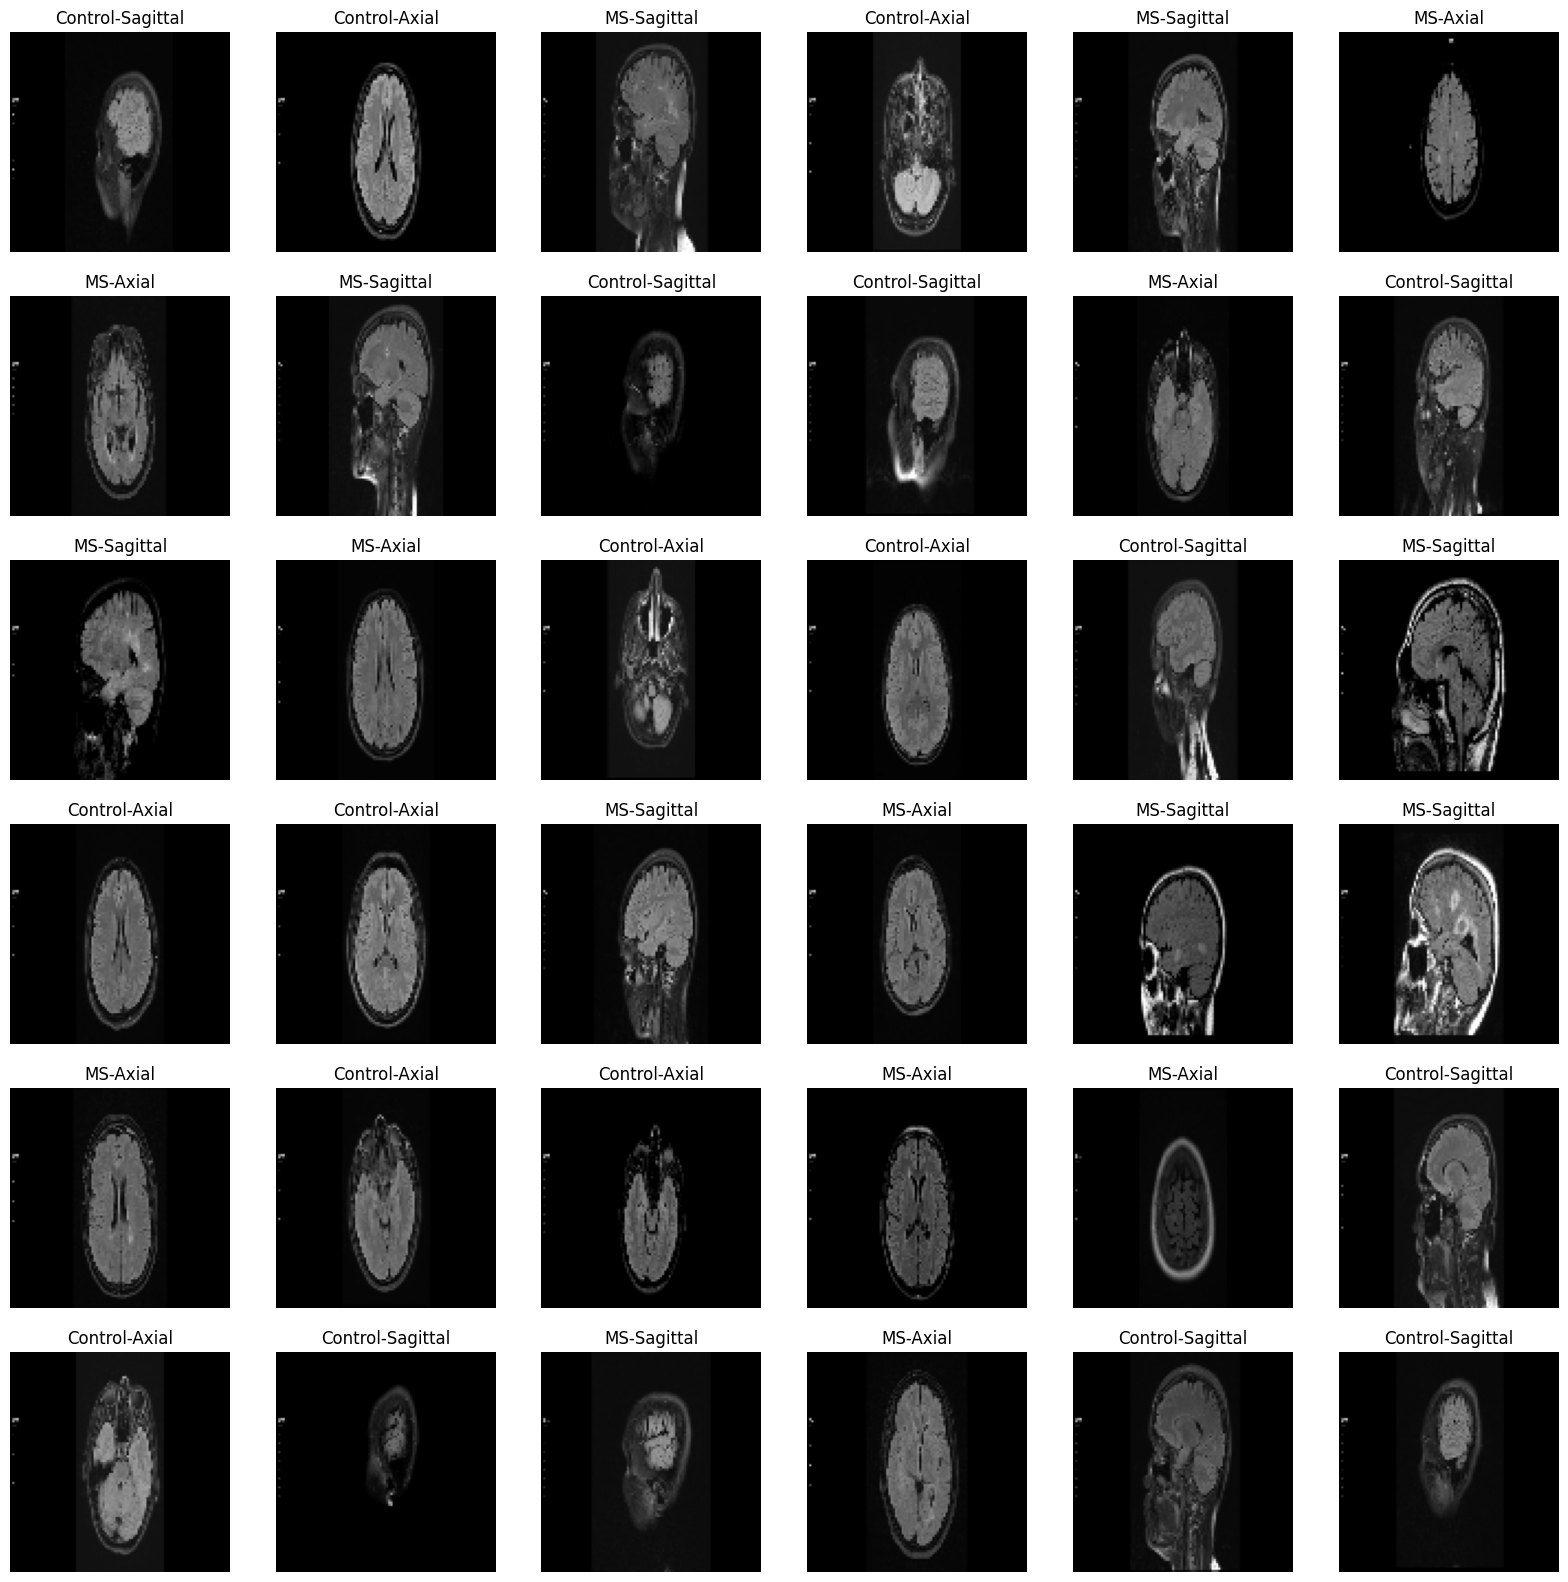

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('Off')
    plt.title(get_code(y_train[i]))

In [12]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')

x_train shape is (3427, 100, 100, 3)
y_train shape is (3427,)


In [13]:
from keras.layers import MaxPooling2D,Dropout

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Assuming you have x_train, y_train, x_test, y_test prepared

# Data split
x_train, x_val_test, y_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

# Preprocess the image data
x_train_preprocessed = x_train / 255.0
x_val_preprocessed = x_val / 255.0
x_test_preprocessed = x_test / 255.0

# Define the base models
s = 100  # Assuming you defined this earlier
base_model_vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(s, s, 3))
base_model_resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(s, s, 3))

# Add custom top layers for classification
model_vgg16 = Sequential()
model_vgg16.add(base_model_vgg16)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(128, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1, activation='sigmoid')) 

model_resnet50 = Sequential()
model_resnet50.add(base_model_resnet50)
model_resnet50.add(Flatten())
model_resnet50.add(Dense(128, activation='relu'))
model_resnet50.add(Dropout(0.5))
model_resnet50.add(Dense(1, activation='sigmoid'))  

# Compile the models with binary cross-entropy loss
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='binary_crossentropy',  
                    metrics=['accuracy'])

model_resnet50.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='binary_crossentropy',  
                      metrics=['accuracy'])

# Train the models
history_vgg16 = model_vgg16.fit(x_train_preprocessed, y_train, batch_size=32, epochs=30, validation_data=(x_val_preprocessed, y_val))
history_resnet50 = model_resnet50.fit(x_train_preprocessed, y_train, batch_size=32, epochs=30, validation_data=(x_val_preprocessed, y_val))



Epoch 1/30
86/86 [==============================] - 23s 137ms/step - loss: -73669099388928.0000 - accuracy: 0.2981 - val_loss: -2134176362921984.0000 - val_accuracy: 0.2828
Epoch 2/30
86/86 [==============================] - 8s 99ms/step - loss: nan - accuracy: 0.2992 - val_loss: nan - val_accuracy: 0.2711
Epoch 3/30
86/86 [==============================] - 8s 99ms/step - loss: nan - accuracy: 0.2973 - val_loss: nan - val_accuracy: 0.2711
Epoch 4/30
86/86 [==============================] - 8s 99ms/step - loss: nan - accuracy: 0.2973 - val_loss: nan - val_accuracy: 0.2711
Epoch 5/30
86/86 [==============================] - 8s 96ms/step - loss: nan - accuracy: 0.2973 - val_loss: nan - val_accuracy: 0.2711
Epoch 6/30
86/86 [==============================] - 8s 96ms/step - loss: nan - accuracy: 0.2973 - val_loss: nan - val_accuracy: 0.2711
Epoch 7/30
86/86 [==============================] - 9s 100ms/step - loss: nan - accuracy: 0.2973 - val_loss: nan - val_accuracy: 0.2711
Epoch 8/30
86/86

11/11 [==============================] - 0s 24ms/step
VGG16 Precision: 0.27
VGG16 Recall: 0.27
VGG16 F1-Score: 0.27
ResNet50 Precision: 0.28
ResNet50 Recall: 0.28
ResNet50 F1-Score: 0.28


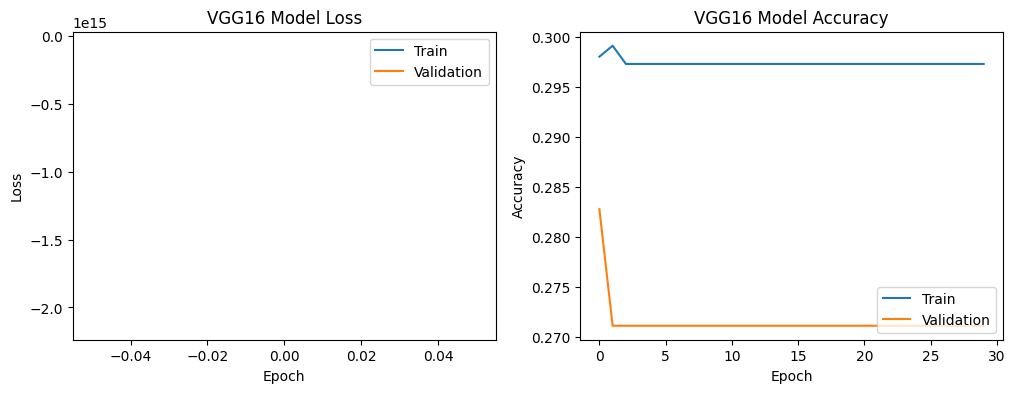

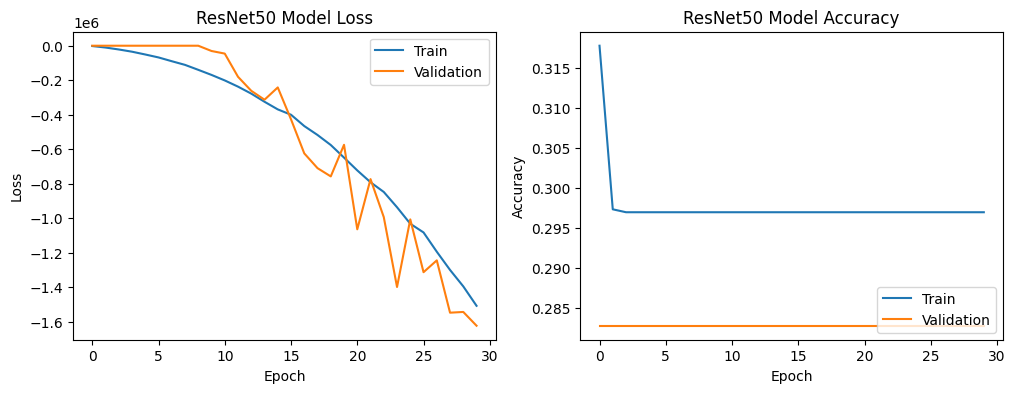

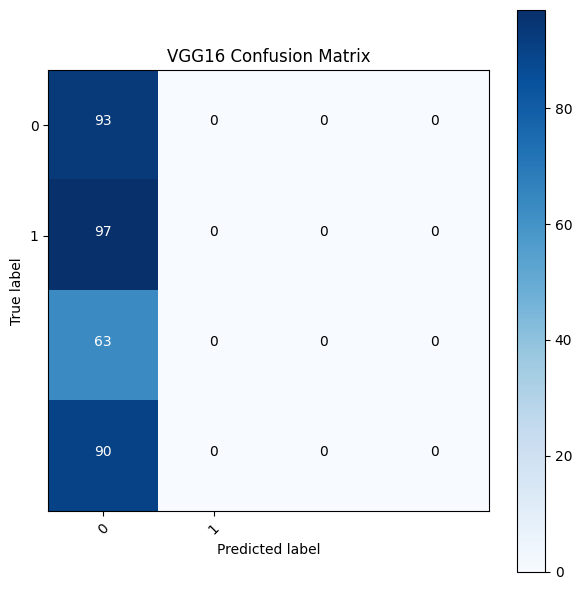

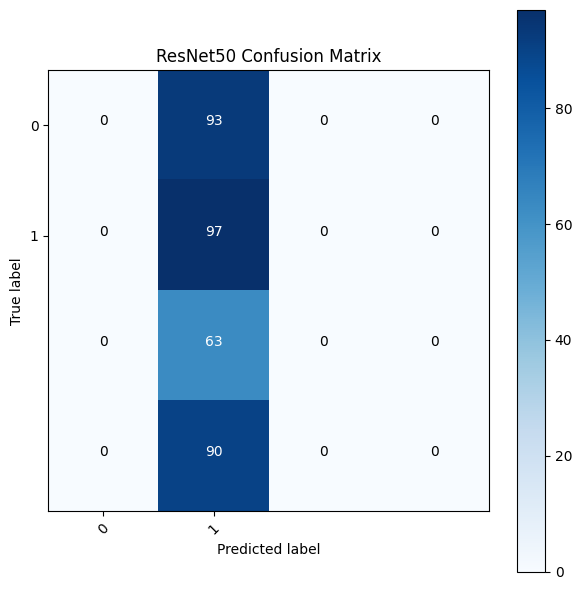

In [17]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Predictions on validation data
y_pred_vgg16 = model_vgg16.predict(x_val_preprocessed)
y_pred_resnet50 = model_resnet50.predict(x_val_preprocessed)

# Convert predicted probabilities to class labels
y_pred_binary_vgg16 = (y_pred_vgg16 > 0.5).astype(int)
y_pred_binary_resnet50 = (y_pred_resnet50 > 0.5).astype(int)

# Calculate precision, recall, and F1-score
precision_vgg16, recall_vgg16, f1_score_vgg16, _ = precision_recall_fscore_support(y_val, y_pred_binary_vgg16, average='micro')
precision_resnet50, recall_resnet50, f1_score_resnet50, _ = precision_recall_fscore_support(y_val, y_pred_binary_resnet50, average='micro')

print("VGG16 Precision: {:.2f}".format(precision_vgg16))
print("VGG16 Recall: {:.2f}".format(recall_vgg16))
print("VGG16 F1-Score: {:.2f}".format(f1_score_vgg16))

print("ResNet50 Precision: {:.2f}".format(precision_resnet50))
print("ResNet50 Recall: {:.2f}".format(recall_resnet50))
print("ResNet50 F1-Score: {:.2f}".format(f1_score_resnet50))

# Plot loss and accuracy graphs
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation loss values
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    # Plot training & validation accuracy values
    plt.subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.show()

plot_history(history_vgg16, 'VGG16')
plot_history(history_resnet50, 'ResNet50')

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()
    classes = [0, 1]  # Replace with your class labels if needed
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(y_val, y_pred_binary_vgg16, 'VGG16')
plot_confusion_matrix(y_val, y_pred_binary_resnet50, 'ResNet50')
